In [1]:
! ls -1ha kaggle.json

kaggle.json


In [4]:
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 KB 983.9 kB/s eta 0:00:0031m1.9 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 KB 839.7 kB/s eta 0:00:0031m1.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 KB 1.3 MB/s eta 0:00:002.3 MB/s eta 0:00:01
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73049 sha256=37df42f22c6795b7d59ccfff03c8391fb87b345aec7237e3a78439810b63e90d
  Stored in directory: /Users/moonseokmin/Library/Caches/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle


In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json
# 내가 참가한 대회 리스트 확인
!kaggle competitions list

ref                                                       deadline             category            reward  teamCount  userHasEntered  
--------------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
mpetitions/contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         34           False  
mpetitions/gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        132           False  
mpetitions/store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge       1388           False  
mpetitions/tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        177           False  
mpetitions/digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2182           False  
mpetitions/titanic                                     

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
articles = pd.read_csv('./articles.csv')
customers = pd.read_csv('./customers.csv')
transactions = pd.read_csv('./transactions_train.csv')

## Transactions

Go to Table of Content

Transactions data description:
> - `t_date`: transaction date.
> - `customer_id`: A unique identifier of every customer(in `customers` table)
> - `article_id`: A unique identifier of every article(in `articles` table)
> - `price`: Price of purchase
> - `sales_channel_id`: 1 or 2

In [6]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [9]:
pd.set_option('display.float_format', '{:.4f}'.format)
transactions.describe()['price']

count   31788324.0000
mean           0.0278
std            0.0192
min            0.0000
25%            0.0158
50%            0.0254
75%            0.0339
max            0.5915
Name: price, dtype: float64

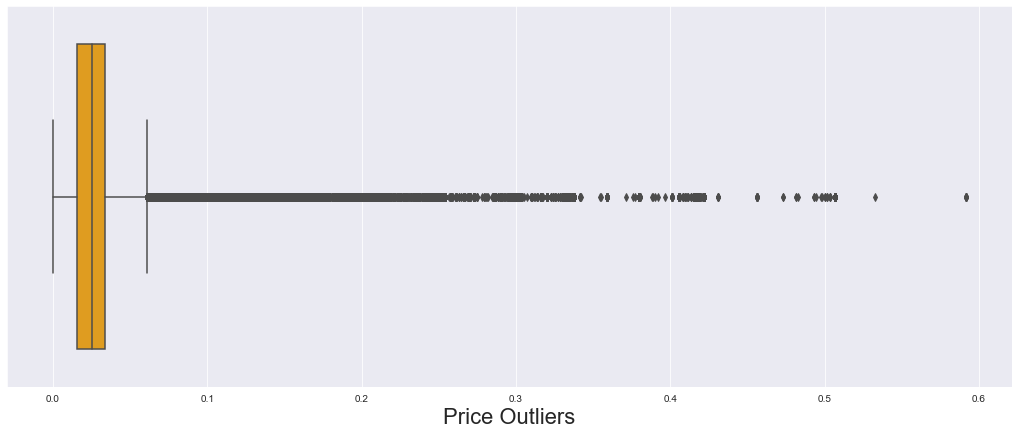

In [12]:
sns.set_style('darkgrid')

f, ax = plt.subplots(figsize=(18,7))

ax = sns.boxplot(data=transactions, x='price', color='orange')
ax.set_xlabel('Price Outliers', fontsize=22)

plt.show()

In [13]:
transactions_byid = transactions.groupby(['customer_id']).count()

In [14]:
transactions_byid.sort_values('price', ascending=False)['price'][:10]

customer_id
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d    1208
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa    1170
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076    1169
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296    1157
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55    1143
Name: price, dtype: int64

However, comparing prices inside groups is more accurate, because accessories and trousers prices may vary largely.

In [15]:
articles_for_merge = articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]

In [16]:
articles_for_merge = transactions[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')

articles_for_merge.head()

,customer_id,article_id,price,t_dat,prod_name,product_type_name,product_group_name,index_name
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.0508,2018-09-20,Atlanta Push Body Harlow,Underwear body,Underwear,Lingeries/Tights
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.0305,2018-09-20,Rae Push (Melbourne) 2p,Bra,Underwear,Lingeries/Tights
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.0152,2018-09-20,Inca Jumper,Sweater,Garment Upper body,Divided
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.0169,2018-09-20,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Ladieswear
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.0169,2018-09-20,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Ladieswear


Here we see outliers for group name prices. Lower/Upper/Full body have a huge price variance. I guess it could be like some unique collections, relative to casual ones. Some high price articles even belong to accessories group.

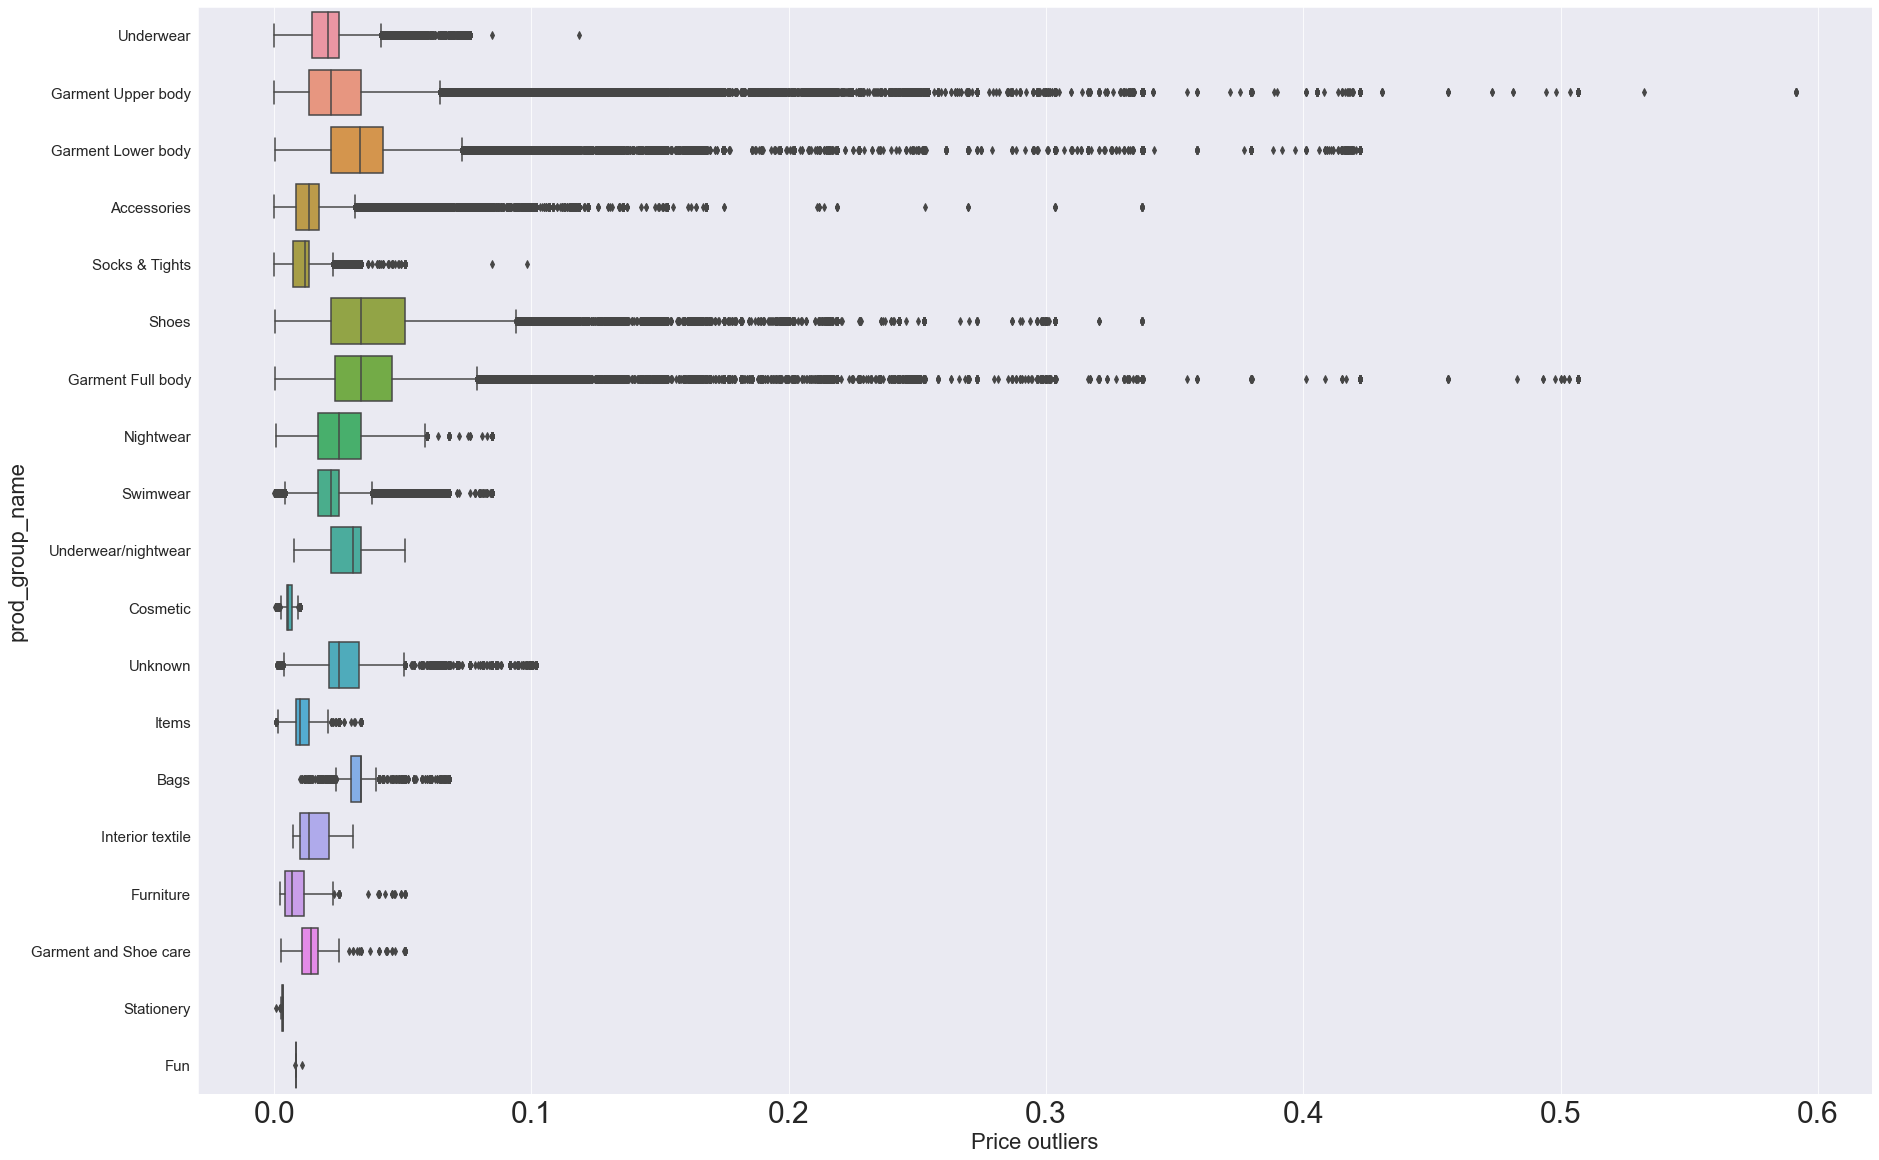

In [19]:
f, ax = plt.subplots(figsize=(30,20))

ax = sns.boxplot(data=articles_for_merge, x='price', y='product_group_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('prod_group_name', fontsize=22)
ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=15)

plt.show()

Then look at boxplot prices according to accessories product group and find the reasons of high prices inside group.

The largest outliers can be found among bags, which is logical enough. In addition, scarves and other accessories have articles with prices highly contrasting to the rest of garments.

In [22]:
articles_for_merge['product_group_name'].unique()
# articles_for_merge.groupby(['index_name']).count()['customer_id']

array(['Underwear', 'Garment Upper body', 'Garment Lower body',
       'Accessories', 'Socks & Tights', 'Shoes', 'Garment Full body',
       'Nightwear', 'Swimwear', 'Underwear/nightwear', 'Cosmetic',
       'Unknown', 'Items', 'Bags', 'Interior textile', 'Furniture',
       'Garment and Shoe care', 'Stationery', 'Fun'], dtype=object)

In [27]:
data_acce = articles_for_merge[articles_for_merge['product_group_name'] == 'Accessories'][['product_type_name', 'price']]

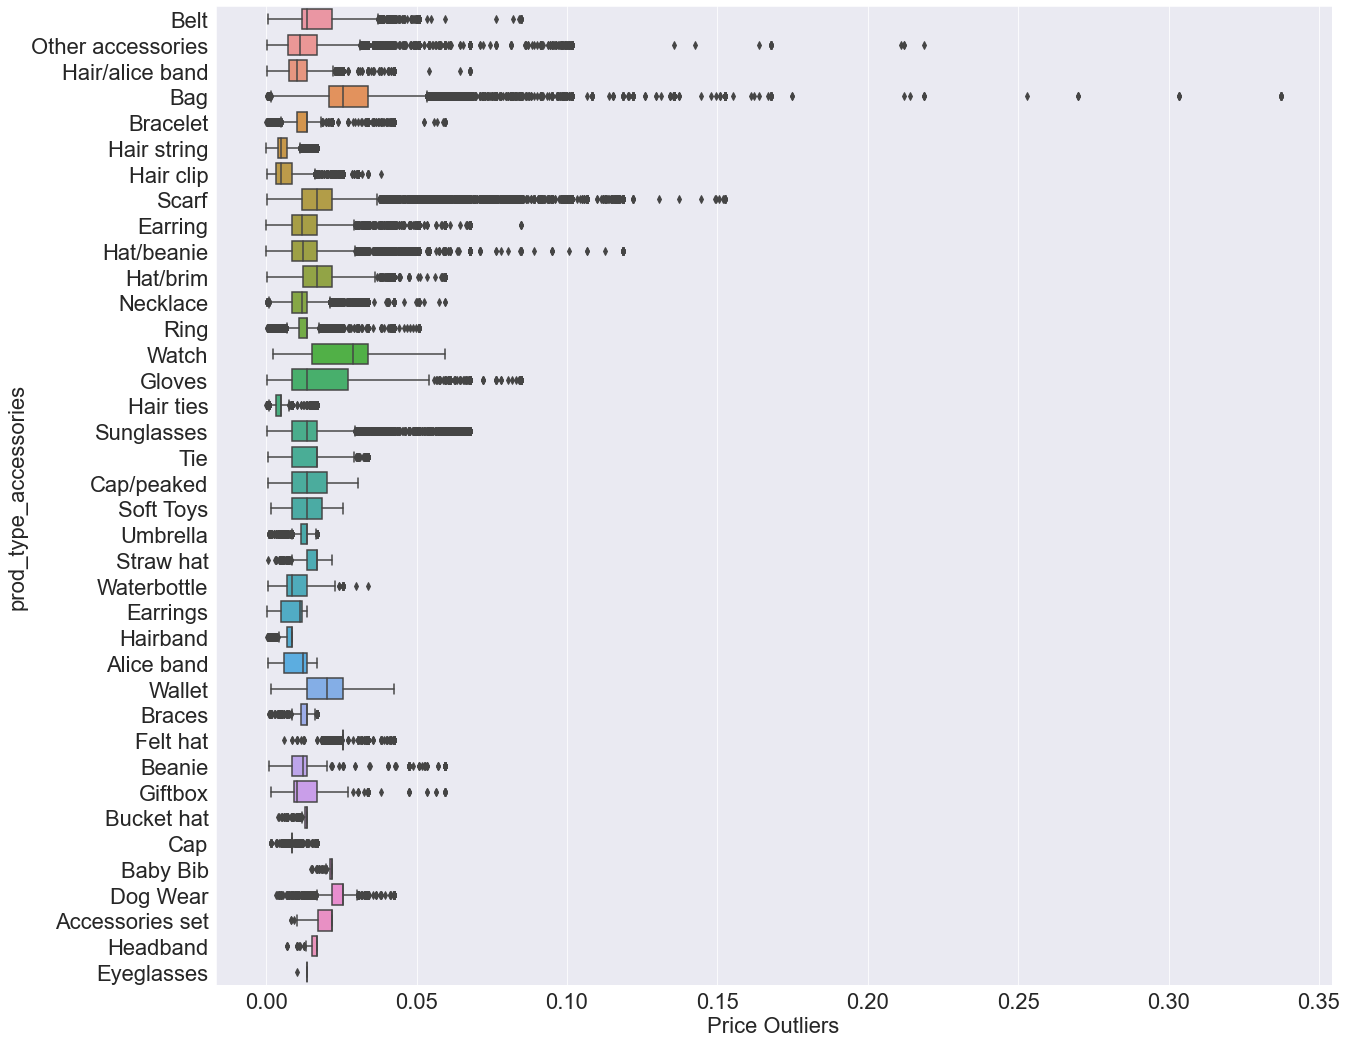

In [29]:
f, ax = plt.subplots(figsize=(20, 18))

ax = sns.boxplot(data=data_acce, x='price', y='product_type_name')
ax.set_xlabel('Price Outliers', fontsize=22)
ax.set_ylabel('prod_type_accessories', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)

plt.show()

The index with the highest mean price is Ladieswear. With the lowest- children.

In [47]:
articles_index = articles_for_merge[['index_name', 'price']].groupby('index_name').mean()

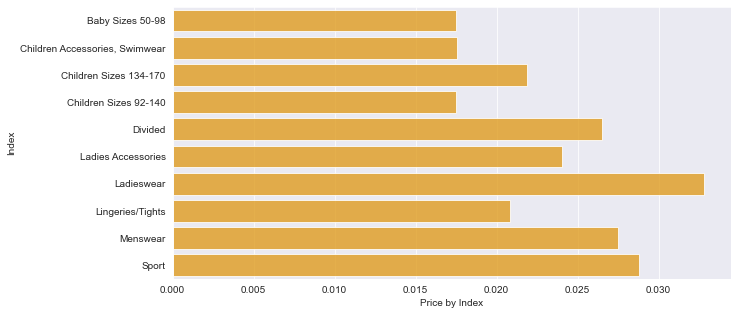

In [50]:
f, ax = plt.subplots(figsize=(10, 5))

ax = sns.barplot(x=articles_index['price'], y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by Index')
ax.set_ylabel('Index')
plt.show()

Stationery has the lowest mean price, the highest - shoe.

In [52]:
articles_group = articles_for_merge[['product_group_name', 'price']].groupby('product_group_name').mean()

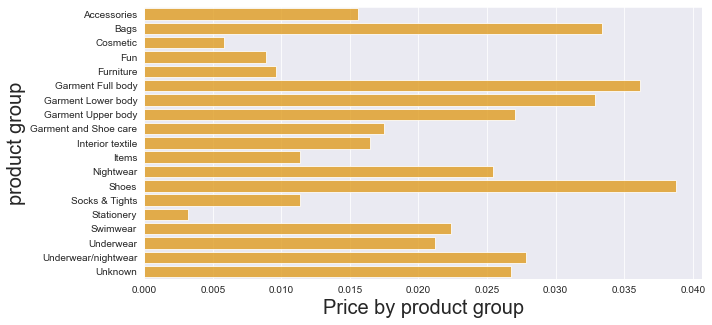

In [57]:
sns.set_style('darkgrid')

f, ax = plt.subplots(figsize=(10, 5))

ax = sns.barplot(alpha=0.8, data=articles_group, x='price', y=articles_group.index, color='orange')
ax.set_xlabel('Price by product group', fontsize=20)
ax.set_ylabel('product group', fontsize=20)



plt.show()

Now check the mean price change in time for top 5 product groups by mean price:

> - `Shoes`
> - `Garment Full body`
> - `Bags`
> - `Garment Lower body`
> - `Underwear/ nightwear`

In [61]:
articles_for_merge['t_dat']= pd.to_datetime(articles_for_merge['t_dat'])

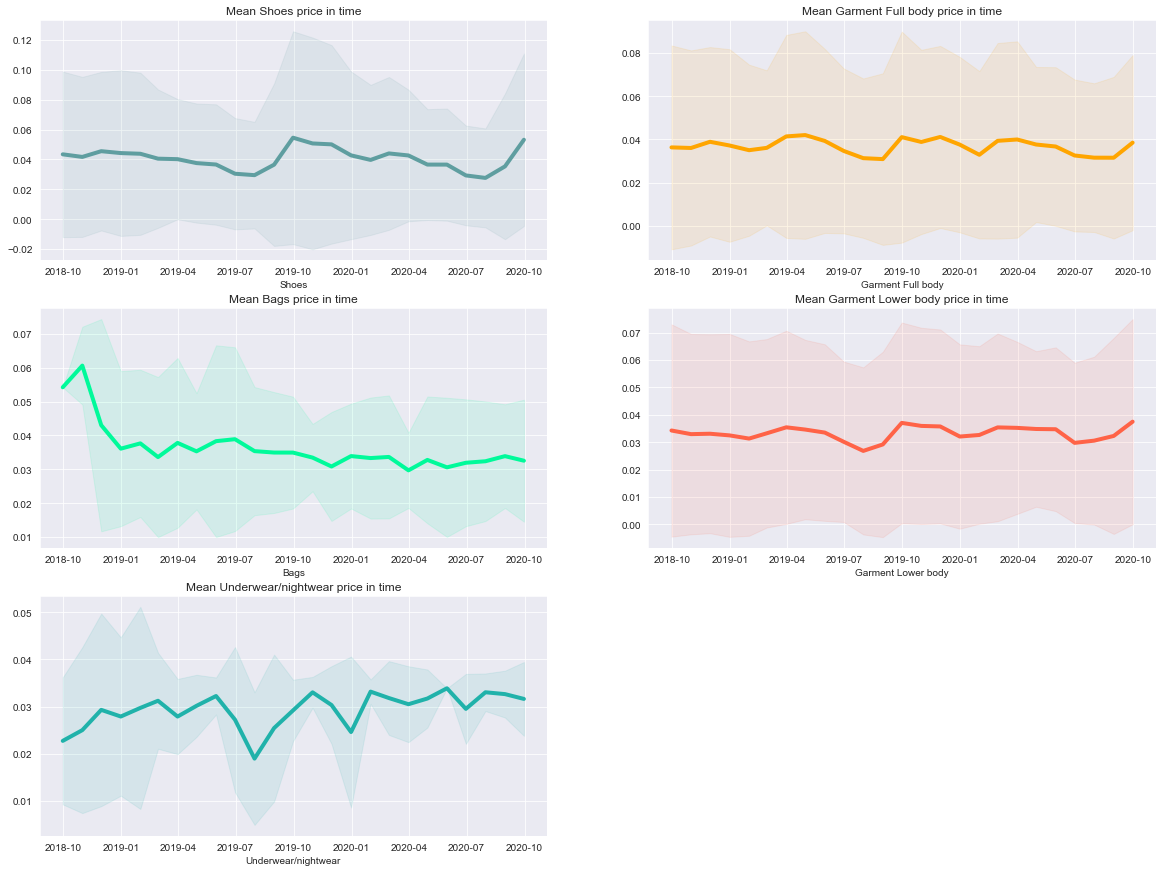

In [62]:
product_list = ['Shoes', 'Garment Full body', 'Bags', 'Garment Lower body', 'Underwear/nightwear']
colors = ['cadetblue', 'orange', 'mediumspringgreen', 'tomato', 'lightseagreen']

k = 0
f, ax = plt.subplots(3, 2, figsize=(20, 15))

for i in range(3):
    for j in range(2):
        try:
            product = product_list[k]
            articles_for_merge_product = articles_for_merge[articles_for_merge.product_group_name == product_list[k]]
            series_mean = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean().fillna(0)
            series_std = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)
            ax[i, j].plot(series_mean, linewidth=4, color=colors[k])
            ax[i, j].fill_between(series_mean.index, (series_mean.values-2*series_std.values).ravel(), 
                             (series_mean.values+2*series_std.values).ravel(), color=colors[k], alpha=.1)
            ax[i, j].set_title(f'Mean {product_list[k]} price in time')
            ax[i, j].set_xlabel('month')
            ax[i, j].set_xlabel(f'{product_list[k]}')
            k += 1
        except IndexError:
            ax[i, j].set_visible(False)
plt.show()
